In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Read in the preprocessed data file
After scanning in the spreadsheets and performing optical character recognition to get the data into electronic format. After doing this I needed to perform some data clean up caused by hand written notes and highlighter markings on the spreadsheet.

In [2]:
df = pd.read_excel('./Data/File1.xlsx')

## Data Evaluation
The unfortunate thing regarding this data set is it's small size. We only have 42 records.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 28 columns):
Account Number        42 non-null int64
PortID                42 non-null object
Remaining Balance     42 non-null float64
interests Fees        42 non-null float64
Date Opened           42 non-null datetime64[ns]
Charge Off Date       42 non-null datetime64[ns]
Last Pay Date         38 non-null datetime64[ns]
Last Pay Amount       42 non-null float64
Last Activity Date    42 non-null datetime64[ns]
Interest Rate %       42 non-null float64
Issuer                42 non-null object
Merchant              42 non-null object
FCFRA Date            42 non-null datetime64[ns]
OOS Date              42 non-null datetime64[ns]
Account Type          42 non-null object
Last Name             42 non-null object
First Name            42 non-null object
Middle Name           28 non-null object
Address               42 non-null object
City                  42 non-null object
State                 42 n

### Names are all capitals letters

In [4]:
cols = ['Last Name','First Name','Middle Name']
df[cols].sort_values(cols).head()

,Last Name,First Name,Middle Name
17,ANDY,HEIDI,J
36,ARAGON,OLIVIA,K
30,BALDWIN,TESSIE,M
16,BOURYAD,LOUBNA,NaN
41,BRYANT,JEFFREY,D


### Missing Data Evaluation
- A large percentage of this data set is missing an employer phone number. Being employed might be an important thing if you want someone to repay a debt. This data will be filled in for live data as I will have assess to LexisNexis account and can retrieve that information.
- Again with the live data having access to LexisNexis will give me the ability to fill-in missing middle names. For this project I won't attempt to fill in the missing data.
- There are a number of missing home phone numbers might be an issue for collecting, but won't have an impact on the analysis.
- There are 2 missing SSN's this won't have an impact the analysis.

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Middle Name,14,0.333333
Last Pay Date,4,0.095238
Paid,0,0.000000
FCFRA Date,0,0.000000
PortID,0,0.000000
Remaining Balance,0,0.000000
interests Fees,0,0.000000
Date Opened,0,0.000000
Charge Off Date,0,0.000000
Last Pay Amount,0,0.000000


## What was the ROI for this protfolio?

In [6]:
print("Total debt {0:.2f}".format(math.fsum(df['Remaining Balance'])))

print("Cost per dollar of debt {0:.2f}".format(6000/math.fsum(df['Remaining Balance'])))

# Below are the amounts collected from the bundles
print("Rate of return {0:.2f}%".format(((571.54 + 2135.20 + 984.34 + 25500.00 + 800.00)/6000) * 100))

Total debt 182222.36
Cost per dollar of debt 0.03
Rate of return 499.85%


## Looking at the people that took the deal and paid

In [8]:
mask = df['Paid'] == 1
df[mask][['Remaining Balance','interests Fees']].sort_values(by='Remaining Balance',ascending=True)

,Remaining Balance,interests Fees
11,464.17,95.68
20,776.40,170.71
36,1566.15,253.32
19,1598.10,258.49
23,11471.81,15345.69


## Are the features Correlated?
This didn't yield anything that wasn't already suspected. The "Last Pay Amount" and "Remaining Balance" where correlated. Also, "Interest Rate" and "interests Fees" had a correlation.

[Text(0, 0.5, 'Account Number'),
 Text(0, 1.5, 'Remaining Balance'),
 Text(0, 2.5, 'interests Fees'),
 Text(0, 3.5, 'Last Pay Amount'),
 Text(0, 4.5, 'Interest Rate %'),
 Text(0, 5.5, 'SSN'),
 Text(0, 6.5, 'Home Phone'),
 Text(0, 7.5, 'Employer Phone'),
 Text(0, 8.5, 'Paid')]

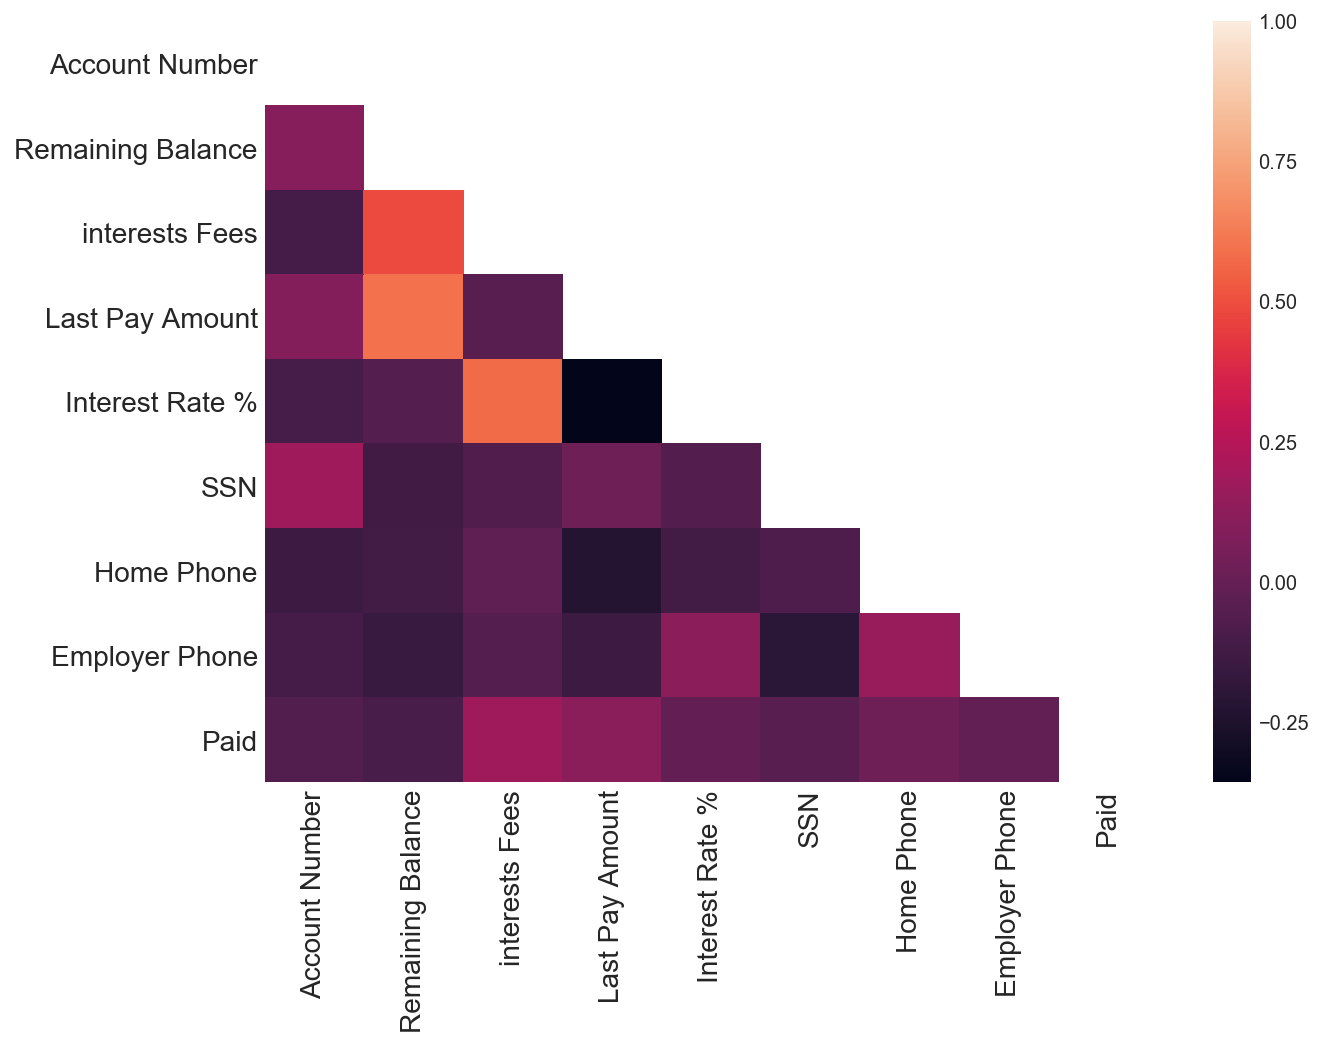

In [9]:
df_corr = df.corr()

# Set the default matplotlib figure size to 7x7:
fix, ax = plt.subplots(figsize=(10,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=False)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)